In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Happiness 2021.csv')

cols = [1,3,4,5,12,13,14,15,16,17,18,19]
df.drop(df.columns[cols], axis = 1, inplace=True)

df = df.rename(columns = {"Country name" : "Country", "Ladder score":"Score", "Logged GDP per capita" : "GDP", 
                          "Social support" : "Family",
                          "Healthy life expectancy" : "Health", 
                          "Freedom to make life choices" : "Freedom",
                          "Perceptions of corruption" : "Corruption"})

codes, uniques = pd.factorize(df.Country, sort= True )
codes +=1
df.Country = codes

df['Rank'] = np.arange(len(df))+1
print(df)





     Country  Score     GDP  Family  Health  Freedom  Generosity  Corruption  \
0         41  7.842  10.775   0.954  72.000    0.949      -0.098       0.186   
1         34  7.620  10.933   0.954  72.700    0.946       0.030       0.179   
2        129  7.571  11.117   0.942  74.400    0.919       0.025       0.292   
3         55  7.554  10.878   0.983  73.000    0.955       0.160       0.673   
4         97  7.464  10.932   0.942  72.400    0.913       0.175       0.338   
..       ...    ...     ...     ...     ...      ...         ...         ...   
144       75  3.512   7.926   0.787  48.700    0.715      -0.131       0.915   
145       16  3.467   9.782   0.784  59.269    0.824      -0.246       0.801   
146      115  3.415   7.676   0.552  61.400    0.897       0.061       0.167   
147      149  3.145   7.943   0.750  56.201    0.677      -0.047       0.821   
148        1  2.523   7.695   0.463  52.493    0.382      -0.102       0.924   

     Rank  
0       1  
1       2  
2  

<ipython-input-73-a75988f34cc1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['']+label)
<ipython-input-73-a75988f34cc1>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['']+label)


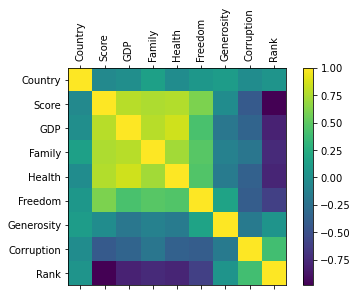

In [73]:
#Correlations as a color chart
figure = plt.figure()
axes = figure.add_subplot(111)

label = list(df.columns)

caxes = axes.matshow(df.corr())
figure.colorbar(caxes)

axes.set_xticklabels(['']+label)
axes.set_yticklabels(['']+label)

plt.setp(axes.get_xticklabels(), rotation=90)

plt.show()

In [74]:
#linear regression on all of the data and all of the attributes, except "rank"
x = df[['Country','GDP','Family','Health', 'Freedom','Generosity', 'Corruption']]
y = df[['Score']]
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x,y)
print(regr.coef_)


x1 = df[['Country','GDP','Family','Health', 'Freedom','Generosity', 'Corruption', 'Rank']]
y1 = df[['Score']]
regr_without_rank = linear_model.LinearRegression()
regr_without_rank.fit(x1,y1)
print(regr_without_rank.coef_)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size = 0.3, shuffle = True )

x2 = df[['Country','GDP','Family','Health', 'Freedom','Generosity', 'Corruption', 'Rank']]
y2 = df[['Score']]
LR = LinearRegression()
LR.fit(x_train, y_train)
y_prediction = LR.predict(x_test)

print(y_prediction)
print(y_test)

[[-2.73510624e-03  2.62948318e-01  2.88625445e+00  2.74747330e-02
   1.99471581e+00  4.37991316e-01 -6.31888532e-01]]
[[-4.93768872e-04 -5.05137807e-03  6.06515946e-01 -9.72330457e-04
   1.30680560e-02  1.45997910e-01 -2.16562911e-01 -2.31243300e-02]]
[[4.12217815]
 [4.62566531]
 [4.97629243]
 [5.58211295]
 [6.84021391]
 [5.21686152]
 [6.5986607 ]
 [5.25248302]
 [5.88730647]
 [5.08206348]
 [6.83901392]
 [7.3328987 ]
 [7.19647936]
 [6.48863367]
 [5.13104938]
 [7.3903746 ]
 [6.58019746]
 [6.09673363]
 [4.59838754]
 [5.84145768]
 [5.55258618]
 [6.86413734]
 [4.50998819]
 [5.2421133 ]
 [5.49874535]
 [4.85115881]
 [6.60324213]
 [6.29633801]
 [5.06572479]
 [4.37822334]
 [7.26074256]
 [6.09589622]
 [5.58233788]
 [6.67068609]
 [4.31430821]
 [4.24934236]
 [3.93514093]
 [5.85415761]
 [6.39197962]
 [6.91508354]
 [3.99315553]
 [5.66263508]
 [5.41466193]
 [3.86296235]
 [6.29458401]]
     Score
131  4.283
107  4.891
95   5.074
72   5.545
21   6.647
84   5.306
30   6.431
85   5.283
59   5.882
97   5.